In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from joblib import dump

### Read in data

In [11]:
data = pd.read_csv("../../data/clean-orders.csv")

Define new features and training data

In [12]:
data["ship_diff"] = data["days_to_ship_actual"] - data["days_to_ship_scheduled"]

In [13]:
train_columns = [
    "ship_diff",
    "quantity",
    "sales",
    "discount"
]
train_data = data[train_columns]

### Fit Linear Regression

Fit linear regression model to predict profit

In [14]:
reg = LinearRegression().fit(train_data, data.profit)

In [15]:
reg.predict(train_data)

array([ 76.32322288, 157.96889148,  32.23854063, ..., 505.74012946,
       -35.47348086, 315.91398246])

In [17]:
data["predicted_profit"] = reg.predict(train_data)

<AxesSubplot:xlabel='profit', ylabel='predicted_profit'>

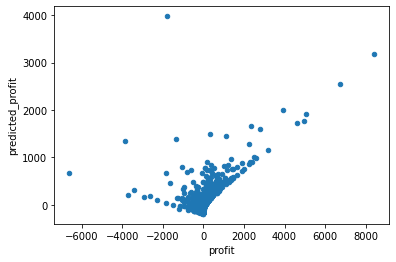

In [18]:
data.plot.scatter("profit", "predicted_profit")

In [21]:
dump(reg, "model.joblib")

['model.joblib']